In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('thyroid_cancer_risk_data.csv')

In [3]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [4]:
df.drop(columns='Patient_ID',inplace=True)

In [5]:
df.head()

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [6]:
df.isnull().sum()

Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  212691 non-null  int64  
 1   Gender               212691 non-null  object 
 2   Country              212691 non-null  object 
 3   Ethnicity            212691 non-null  object 
 4   Family_History       212691 non-null  object 
 5   Radiation_Exposure   212691 non-null  object 
 6   Iodine_Deficiency    212691 non-null  object 
 7   Smoking              212691 non-null  object 
 8   Obesity              212691 non-null  object 
 9   Diabetes             212691 non-null  object 
 10  TSH_Level            212691 non-null  float64
 11  T3_Level             212691 non-null  float64
 12  T4_Level             212691 non-null  float64
 13  Nodule_Size          212691 non-null  float64
 14  Thyroid_Cancer_Risk  212691 non-null  object 
 15  Diagnosis        

In [8]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [9]:
df.shape

(212691, 16)

In [10]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns  # Select categorical columns

for col in categorical_cols:
    print(f"Value counts for column: {col}\n")
    print(df[col].value_counts(), "\n" + "-"*40 + "\n")  # Display counts for each unique value

Value counts for column: Gender

Gender
Female    127527
Male       85164
Name: count, dtype: int64 
----------------------------------------

Value counts for column: Country

Country
India          42496
China          31978
Nigeria        31918
Brazil         21413
Russia         21297
Japan          16867
South Korea    14965
UK             10642
USA            10558
Germany        10557
Name: count, dtype: int64 
----------------------------------------

Value counts for column: Ethnicity

Ethnicity
Caucasian         63669
Asian             53261
African           42414
Hispanic          32012
Middle Eastern    21335
Name: count, dtype: int64 
----------------------------------------

Value counts for column: Family_History

Family_History
No     148866
Yes     63825
Name: count, dtype: int64 
----------------------------------------

Value counts for column: Radiation_Exposure

Radiation_Exposure
No     180831
Yes     31860
Name: count, dtype: int64 
-----------------------------

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Diagnosis']),df['Diagnosis'], test_size=0.2)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((170152, 15), (42539, 15), (170152,), (42539,))

In [13]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns  # Select categorical columns
categorical_cols

Index(['Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'Thyroid_Cancer_Risk'],
      dtype='object')

In [14]:
# List of nominal and ordinal columns as previously defined
nominal_columns = [
    'Gender', 'Country', 'Ethnicity', 'Family_History',
    'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
    'Diabetes'
]

ordinal_columns = [
    'Thyroid_Cancer_Risk'
]

In [15]:
# Define the categories for each ordinal feature
category_orders = [
    ['Low','Medium','High']
]

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [17]:
transformer = ColumnTransformer(
    transformers=[
        ('tnf1',OrdinalEncoder(categories=category_orders),ordinal_columns),
        ('tnf2',OneHotEncoder(sparse_output=False,drop='first'),nominal_columns)
    ],remainder='passthrough'
)

In [18]:
X_train_en = transformer.fit_transform(X_train)
X_test_en = transformer.fit_transform(X_test)

In [19]:
X_train_en.shape , X_test_en.shape

((170152, 26), (42539, 26))

In [20]:
y_train_en = pd.get_dummies(y_train, drop_first=True,dtype=int)
y_test_en = pd.get_dummies(y_test, drop_first=True,dtype=int)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [22]:
model = LogisticRegression(solver='saga', max_iter=1000)

In [23]:
model.fit(X_train_en,y_train_en.values.ravel())

LogisticRegression(max_iter=1000, solver='saga')

In [24]:
y_pred = model.predict(X_test_en)
y_train_pred = model.predict(X_train_en)

In [25]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [26]:
y_train_pred

array([0, 1, 0, ..., 1, 0, 0])

In [27]:
# 8️⃣ Evaluate Model
accuracy_test = accuracy_score(y_test_en, y_pred)
accuracy_train = accuracy_score(y_train_en, y_train_pred)
print(f"Test Accuracy: {accuracy_test:.2f}")
print(f"Train Accuracy: {accuracy_train:.2f}")

Test Accuracy: 0.82
Train Accuracy: 0.83


In [28]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
cm = confusion_matrix(y_test_en, y_pred)
cm

array([[30575,  1940],
       [ 5579,  4445]], dtype=int64)

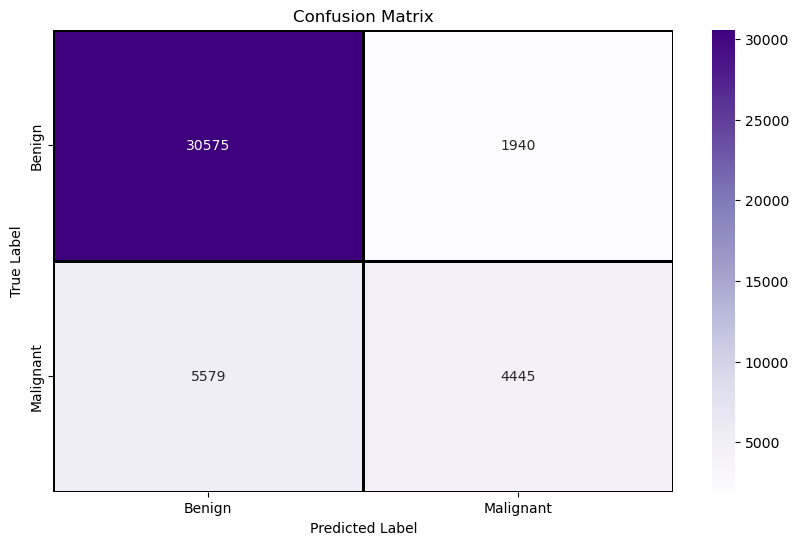

In [29]:
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Purples",linewidths=1, linecolor='black',
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Try different model

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from joblib import parallel_backend

In [ ]:
# Define classifiers with improved parameters
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver="saga"),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Support Vector Machine": SVC(kernel="rbf", C=1.0),
}

# Train and evaluate each model
results = {}
for name, clf in classifiers.items():
    print("model use :",name)
    with parallel_backend("threading"):
        clf.fit(X_train_en, y_train_en.values.ravel())
    y_pred = clf.predict(X_test_en)
    accuracy = accuracy_score(y_test_en, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test_en, y_pred))
    print("-" * 50)

# Find the best model
best_model = max(results, key=results.get)
print(f"Best model: {best_model} with accuracy {results[best_model]:.4f}")

model use : Logistic Regression
Logistic Regression Accuracy: 0.8232
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32515
           1       0.70      0.44      0.54     10024

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.82      0.81     42539

--------------------------------------------------
model use : Random Forest
Random Forest Accuracy: 0.8241
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32515
           1       0.70      0.45      0.55     10024

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.82      0.81     42539

--------------------------------------------------
model use : K-Nearest Neighbors


C:\Users\parvez\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\parvez\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\parvez\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\parvez\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\parvez\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

K-Nearest Neighbors Accuracy: 0.7841
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     32515
           1       0.58      0.31      0.40     10024

    accuracy                           0.78     42539
   macro avg       0.70      0.62      0.63     42539
weighted avg       0.76      0.78      0.76     42539

--------------------------------------------------
model use : Decision Tree
Decision Tree Accuracy: 0.8214
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     32515
           1       0.69      0.44      0.54     10024

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.71     42539
weighted avg       0.81      0.82      0.81     42539

--------------------------------------------------
model use : Support Vector Machine


In [ ]:
!pip install --upgrade joblib
